In [1]:
import scipy.io
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt 

#Opening the equilibria file
mat = scipy.io.loadmat('equilibria.mat')
equilibria=mat["equilibria"]


In [2]:
#Applying dbscan:
min_samples=4
eps=0.01

clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(equilibria)
#FInished applying the dbscan

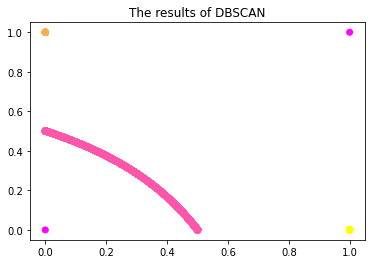

num clusters (without the noise)= 3


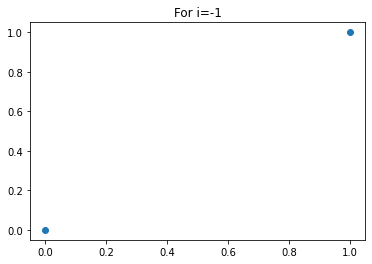

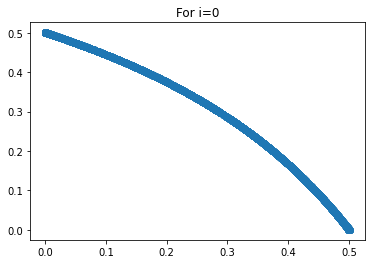

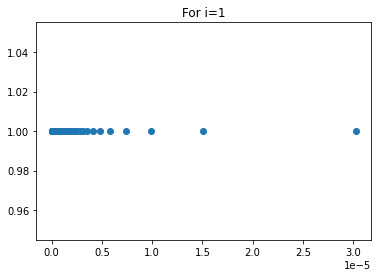

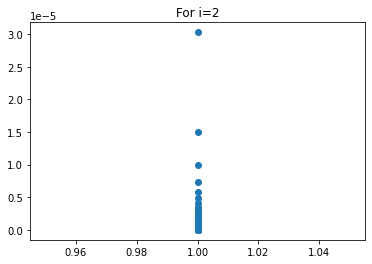

In [4]:
#Now Plotting the clusters
clusters = clustering.labels_
plt.scatter(equilibria[:,0], equilibria[:,1], c=clusters, cmap="spring")
plt.title("The results of DBSCAN")
plt.show()

#Dividing the labels in the different teams
min_label=np.min(clusters)
max_label=np.max(clusters)
print("num clusters (without the noise)=",max_label+1)

for i in range(min_label, max_label+1):
    current_indices=np.where(clusters==i)[0]
    plt.figure()
    plt.title("For i=%d" % (i))
    plt.scatter(equilibria[current_indices, 0], equilibria[current_indices, 1])
    plt.show()
#Finished plotting

In [ ]:
#Saving the labels in a csv file
clusters=pd.DataFrame(clusters)
clusters.to_csv("clusters.csv")

